See: https://www.schoolfinancedata.org/wp-content/uploads/2024/01/SID_Codebook_2024.pdf for information about the dataset.

In [48]:
import pandas as pd

indicatorsDf = pd.read_excel('StateIndicatorsDatabase_2024.xlsx', sheet_name='Data')
costDf = pd.read_excel('DistrictCostDatabase_2024.xlsx', sheet_name='Data')

c:\Users\Typin\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\Typin\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Test Score Gap

  Quartile  Average Outcome Gap
0       Q1             0.278942
1       Q2             0.102994
2       Q3             0.000993
3       Q4            -0.095793
4       Q5            -0.316285


C:\Users\Typin\AppData\Local\Temp\ipykernel_29144\742995612.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


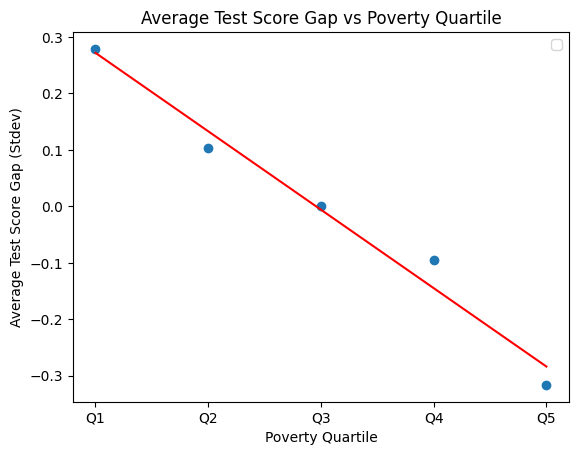

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

outcome_gaps = pd.Series({
    'Q1': indicatorsDf["necm_outcomegap_q1"].mean(),
    'Q2': indicatorsDf["necm_outcomegap_q2"].mean(),
    'Q3': indicatorsDf["necm_outcomegap_q3"].mean(),
    'Q4': indicatorsDf["necm_outcomegap_q4"].mean(),
    'Q5': indicatorsDf["necm_outcomegap_q5"].mean()
})

outcome_gaps_df = outcome_gaps.reset_index()
outcome_gaps_df.columns = ['Quartile', 'Average Outcome Gap']

print(outcome_gaps_df)

# Perform linear regression
X = np.array(outcome_gaps_df.index).reshape(-1, 1)
y = outcome_gaps_df['Average Outcome Gap']
model = LinearRegression().fit(X, y)

# Predict values for the line of best fit
y_pred = model.predict(X)

# Plot the data points
plt.scatter(outcome_gaps_df['Quartile'], outcome_gaps_df['Average Outcome Gap'])
plt.plot(outcome_gaps_df['Quartile'], y_pred, color='red')
plt.xlabel('Poverty Quartile')
plt.ylabel('Average Test Score Gap (Stdev)')
plt.title('Average Test Score Gap vs Poverty Quartile')
plt.legend()
plt.show()

# Funding Gap

  Quartile  Average Funding Gap
0       Q1          3519.559845
1       Q2          1984.573580
2       Q3           657.991169
3       Q4          -840.412586
4       Q5         -6652.681223


C:\Users\Typin\AppData\Local\Temp\ipykernel_29144\831631643.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


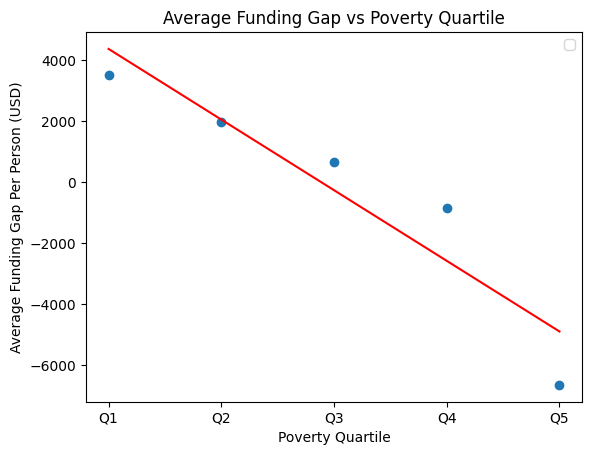

In [ ]:
funding_gaps = pd.Series({
    'Q1': indicatorsDf["necm_fundinggap_q1"].mean(),
    'Q2': indicatorsDf["necm_fundinggap_q2"].mean(),
    'Q3': indicatorsDf["necm_fundinggap_q3"].mean(),
    'Q4': indicatorsDf["necm_fundinggap_q4"].mean(),
    'Q5': indicatorsDf["necm_fundinggap_q5"].mean()
})

funding_gaps_df = funding_gaps.reset_index()
funding_gaps_df.columns = ['Quartile', 'Average Funding Gap']

print(funding_gaps_df)

# Perform linear regression
X = np.array(funding_gaps_df.index).reshape(-1, 1)
y = funding_gaps_df['Average Funding Gap']
model = LinearRegression().fit(X, y)

# Predict values for the line of best fit
y_pred = model.predict(X)

# Plot the data points
plt.scatter(funding_gaps_df['Quartile'], funding_gaps_df['Average Funding Gap'])
plt.plot(funding_gaps_df['Quartile'], y_pred, color='red')
plt.xlabel('Poverty Quartile')
plt.ylabel('Average Funding Gap Per Person (USD)')
plt.title('Average Funding Gap vs Poverty Quartile')
plt.legend()
plt.show()

# Teacher Student Ratio

In [ ]:
predicted_teacher_ratio = pd.Series({
    '0%': indicatorsDf["predicted_tchph0_"].mean(),
    '10%': indicatorsDf["predicted_tchph10_"].mean(),
    '20%': indicatorsDf["predicted_tchph20_"].mean(),
    '30%': indicatorsDf["predicted_tchph30_"].mean()
})

predicted_teacher_ratio_df = predicted_teacher_ratio.reset_index()
predicted_teacher_ratio_df.columns = ['Poverty Ratio', 'Predicted Teachers per 100 Students']

print(predicted_teacher_ratio_df)

# Perform linear regression
X = np.array(predicted_teacher_ratio_df.index).reshape(-1, 1)
y = predicted_teacher_ratio_df['Predicted Teachers per 100 Students']
model = LinearRegression().fit(X, y)

# Predict values for the line of best fit
y_pred = model.predict(X)

# Plot the data points
plt.scatter(predicted_teacher_ratio_df['Quartile'], predicted_teacher_ratio_df['Average Funding Gap'])
plt.plot(predicted_teacher_ratio_df['Quartile'], y_pred, color='red')
plt.xlabel('Poverty Quartile')
plt.ylabel('Average Funding Gap Per Person (USD)')
plt.title('Average Funding Gap vs Poverty Quartile')
plt.legend()
plt.show()

  Poverty Ratio  Predicted Teachers per 100 Students
0            0%                             6.311132
1           10%                             6.444957
2           20%                             6.600800
3           30%                             6.779444


KeyError: ''

# Correlation

The correlation coefficient is nearly 1 which means there is a very strong positive correlation between the two.

In [60]:
# Merge the two dataframes on the Quartile column
merged_df = pd.merge(outcome_gaps_df, funding_gaps_df, on='Quartile')

print(merged_df)

correlation = merged_df['Average Funding Gap'].corr(merged_df['Average Outcome Gap'])

print(f'Correlation between Average Funding Gap and Average Funding Gap: {correlation}')

  Quartile  Average Outcome Gap  Average Funding Gap
0       Q1             0.278942          3519.559845
1       Q2             0.102994          1984.573580
2       Q3             0.000993           657.991169
3       Q4            -0.095793          -840.412586
4       Q5            -0.316285         -6652.681223
Correlation between Average Funding Gap and Average Funding Gap: 0.9662794063479722
